# **Classification of fruits:**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **DATA PREPROCESSING**

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

X = []
float_X = []
y = []

path = "/content/drive/My Drive/minidata/"
types = ["Apple", "Banana", "Mango", "Orange", "jackfruit"] 

for i in types:
    route = os.path.join(path,i)
    for j in os.listdir(route):
        arr = plt.imread(os.path.join(route,j))
        arr1,arr2 = np.array(arr), np.array(arr,dtype = float)
        X.append(arr1)
        float_X.append(arr2)
        # print(len(X))
        y.append(i)
print(len(X))

520


**DATA VISUALIZATION:**

<BarContainer object of 5 artists>

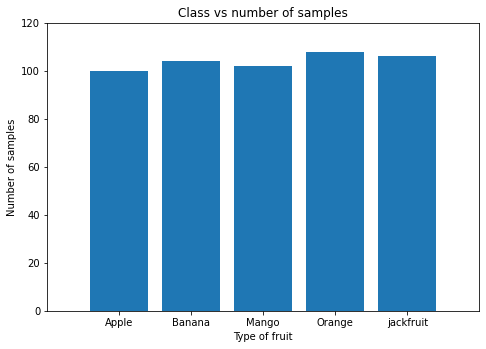

In [3]:
import matplotlib.pyplot as plt
import os
lst =[]
for i in types:
  x = len(os.listdir(os.path.join('/content/drive/My Drive/minidata/',i)))
  lst.append(x)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.axis([-1,5,0,120])
plt.xlabel('Type of fruit')
plt.ylabel('Number of samples')
plt.title('Class vs number of samples')
ax.bar(types,lst)

In [4]:
# Converting list to numpy array
X = np.array(X)
y = np.array(y)
float_X = np.array(float_X)

**Reshaping data**

In [5]:
X = X.reshape(520, 3*90*90 )
float_X = float_X.reshape(520, 3*90*90)

**Splitting dataset**

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle = True, random_state=42)

## **KNN without scaling**

In [7]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

**Predicting**

In [8]:
y_pred = knn.predict(X_test)

**Classification report**

In [9]:
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [10]:
print("Accuracy Score: ", accuracy_score(y_test,y_pred))

Accuracy Score:  0.9615384615384616


In [11]:
import seaborn as sns

r = classification_report(y_test, y_pred,output_dict=True)
df = pd.DataFrame(r).T
df

,precision,recall,f1-score,support
Apple,1.000000,0.962963,0.981132,27.000000
Banana,1.000000,0.952381,0.975610,21.000000
Mango,0.842105,1.000000,0.914286,16.000000
Orange,0.950000,1.000000,0.974359,19.000000
jackfruit,1.000000,0.904762,0.950000,21.000000
accuracy,0.961538,0.961538,0.961538,0.961538
macro avg,0.958421,0.964021,0.959077,104.000000
weighted avg,0.966574,0.961538,0.962209,104.000000


AxesSubplot(0.125,0.125;0.62x0.755)


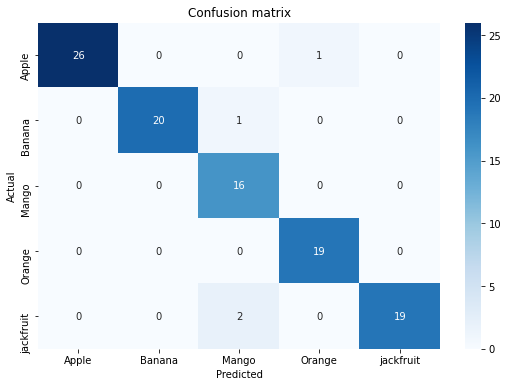

In [12]:
import pandas as pd
# plt.figure(figsize=(15,10))
cm = pd.DataFrame(confusion_matrix(y_test,y_pred), columns=["Apple", "Banana", "Mango", "Orange", "jackfruit"], index = ["Apple", "Banana", "Mango", "Orange", "jackfruit"] )
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'
plt.figure(figsize = (9,6))
plt.title("Confusion matrix")
print(sns.heatmap(cm,annot = True,cmap='Blues'))

## **KNN with Scaled dataset**

**Scaling**

In [13]:
from tqdm import tqdm
scaled_X = float_X
for i in tqdm(range(float_X.shape[0])):
  scaled_X[i]=np.divide(float_X[i],255.0)

100%|██████████| 520/520 [00:00<00:00, 30324.20it/s]


**Splitting dataset**

In [14]:
from sklearn.model_selection import train_test_split
scaled_X_train, scaled_X_test, scaled_y_train, scaled_y_test = train_test_split(scaled_X, y, test_size=0.20, shuffle = True, random_state=42)

**Knn model:**

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(scaled_X_train, scaled_y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

**Prediction**

In [16]:
y_pred = knn.predict(scaled_X_test)

In [17]:
print("Accuracy score: ", accuracy_score(scaled_y_test,y_pred))
r = classification_report(scaled_y_test, y_pred,output_dict=True)
df = pd.DataFrame(r).T
df

Accuracy score:  0.9615384615384616


,precision,recall,f1-score,support
Apple,1.000000,0.962963,0.981132,27.000000
Banana,1.000000,0.952381,0.975610,21.000000
Mango,0.842105,1.000000,0.914286,16.000000
Orange,0.950000,1.000000,0.974359,19.000000
jackfruit,1.000000,0.904762,0.950000,21.000000
accuracy,0.961538,0.961538,0.961538,0.961538
macro avg,0.958421,0.964021,0.959077,104.000000
weighted avg,0.966574,0.961538,0.962209,104.000000


AxesSubplot(0.125,0.125;0.62x0.755)


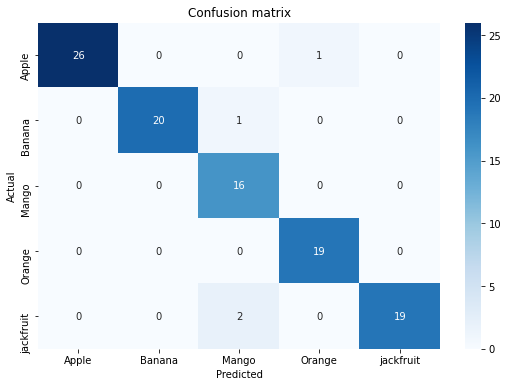

In [18]:
cm = pd.DataFrame(confusion_matrix(scaled_y_test,y_pred), columns=["Apple", "Banana", "Mango", "Orange", "jackfruit"], index = ["Apple", "Banana", "Mango", "Orange", "jackfruit"] )
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'
plt.figure(figsize = (9,6))
plt.title("Confusion matrix")
print(sns.heatmap(cm,annot = True,cmap='Blues'))

## **Hyperparameter tuning: (To find best k value)**

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()

In [20]:
params = {'n_neighbors': [11,13,17,19,21,23,27,29]}

In [21]:
model1 = GridSearchCV(model,params,cv=5,verbose=1,n_jobs=10)

In [22]:
model1.fit(scaled_X_train,scaled_y_train)
model1.best_params_

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  40 out of  40 | elapsed:   45.9s finished


{'n_neighbors': 11}

In [23]:
from sklearn.metrics import confusion_matrix

prediction=model1.predict(scaled_X_test)
print("Accuracy: ",accuracy_score(prediction,scaled_y_test))
r = classification_report(scaled_y_test, prediction,output_dict=True)
df = pd.DataFrame(r).T
df

Accuracy:  0.9038461538461539


,precision,recall,f1-score,support
Apple,1.000000,0.703704,0.826087,27.000000
Banana,1.000000,0.952381,0.975610,21.000000
Mango,0.842105,1.000000,0.914286,16.000000
Orange,0.730769,1.000000,0.844444,19.000000
jackfruit,1.000000,0.952381,0.975610,21.000000
accuracy,0.903846,0.903846,0.903846,0.903846
macro avg,0.914575,0.921693,0.907207,104.000000
weighted avg,0.926522,0.903846,0.903394,104.000000


In [24]:
acc = []
acc.append(accuracy_score(prediction,scaled_y_test))

AxesSubplot(0.125,0.125;0.62x0.755)


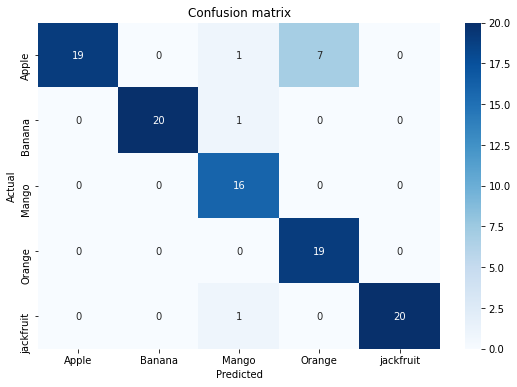

In [25]:
cm = pd.DataFrame(confusion_matrix(scaled_y_test,prediction), columns=["Apple", "Banana", "Mango", "Orange", "jackfruit"], index = ["Apple", "Banana", "Mango", "Orange", "jackfruit"] )
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'
plt.figure(figsize = (9,6))
plt.title("Confusion matrix")
print(sns.heatmap(cm,annot = True,cmap='Blues'))

## **RANDOM FOREST:**

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold,cross_val_score

In [27]:
clf = RandomForestClassifier(verbose=1)

In [28]:
clf.fit(scaled_X_train,scaled_y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.9s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=1, warm_start=False)

In [29]:
y_pred = clf.predict(scaled_X_test)

print("Accuracy score: ", accuracy_score(y_pred,scaled_y_test))
print("Classification report: \n",classification_report(y_pred,scaled_y_test))

Accuracy score:  1.0
Classification report: 
               precision    recall  f1-score   support

       Apple       1.00      1.00      1.00        27
      Banana       1.00      1.00      1.00        21
       Mango       1.00      1.00      1.00        16
      Orange       1.00      1.00      1.00        19
   jackfruit       1.00      1.00      1.00        21

    accuracy                           1.00       104
   macro avg       1.00      1.00      1.00       104
weighted avg       1.00      1.00      1.00       104



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


AxesSubplot(0.125,0.125;0.62x0.755)


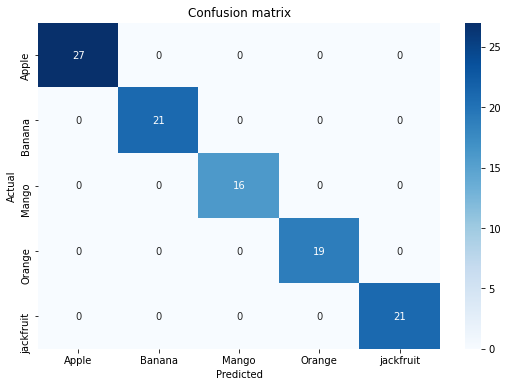

In [30]:
cm = pd.DataFrame(confusion_matrix(scaled_y_test,y_pred), columns=["Apple", "Banana", "Mango", "Orange", "jackfruit"], index = ["Apple", "Banana", "Mango", "Orange", "jackfruit"] )
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'
plt.figure(figsize = (9,6))
plt.title("Confusion matrix")
print(sns.heatmap(cm,annot = True,cmap='Blues'))

### **Hyper parameter tuning:**

In [31]:
params = {'criterion': ['gini' , 'entropy'],
               'n_estimators': range(50,150,10),
               'max_depth': range(10,100,1),
               'min_samples_leaf': range(1,10,1)}

In [32]:
from sklearn.model_selection import RandomizedSearchCV

clf = RandomForestClassifier()
model = RandomizedSearchCV(estimator = clf , param_distributions = params, n_jobs=10)
model.fit(scaled_X_train, scaled_y_train)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
            

In [33]:
model.best_params_

{'criterion': 'gini',
 'max_depth': 46,
 'min_samples_leaf': 2,
 'n_estimators': 80}

In [35]:
y_pred = model.predict(scaled_X_test)

print("Accuracy score: ", accuracy_score(y_pred,scaled_y_test))
r = classification_report(scaled_y_test, y_pred,output_dict=True)
df = pd.DataFrame(r).T
df

Accuracy score:  0.9903846153846154


,precision,recall,f1-score,support
Apple,1.000000,1.000000,1.000000,27.000000
Banana,0.954545,1.000000,0.976744,21.000000
Mango,1.000000,1.000000,1.000000,16.000000
Orange,1.000000,1.000000,1.000000,19.000000
jackfruit,1.000000,0.952381,0.975610,21.000000
accuracy,0.990385,0.990385,0.990385,0.990385
macro avg,0.990909,0.990476,0.990471,104.000000
weighted avg,0.990822,0.990385,0.990379,104.000000


In [36]:
acc.append(accuracy_score(y_pred,scaled_y_test))

AxesSubplot(0.125,0.125;0.62x0.755)


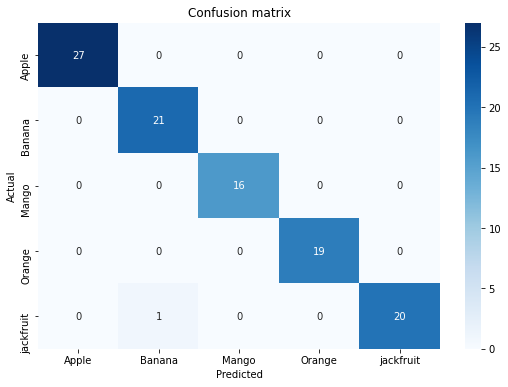

In [37]:
cm = pd.DataFrame(confusion_matrix(scaled_y_test,y_pred), columns=["Apple", "Banana", "Mango", "Orange", "jackfruit"], index = ["Apple", "Banana", "Mango", "Orange", "jackfruit"] )
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'
plt.figure(figsize = (9,6))
plt.title("Confusion matrix")
print(sns.heatmap(cm,annot = True,cmap='Blues'))

**Cross validation scores:**

In [38]:
clf = RandomForestClassifier()
  
scores = cross_val_score(clf,scaled_X,y,cv=10)
print(scores) 
print()
print("Cross Validation Score= ",sum(scores)/len(scores))

[1.         0.98076923 0.96153846 1.         1.         1.
 0.96153846 1.         1.         1.        ]

Cross Validation Score=  0.9903846153846153


# **Convolutional neural network**

In [39]:
import tensorflow as tf

from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense

In [40]:
model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(90, 90, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(64,activation ='relu'))
model.add(Dense(5,activation='softmax'))


In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 88, 88, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 44, 44, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 42, 42, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 21, 21, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 19, 19, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 9, 9, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 5184)              0

In [42]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [43]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_gen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [44]:
train_data = train_gen.flow_from_directory('/content/drive/My Drive/minidata/',
                                           class_mode='categorical',
                                           batch_size =8,
                                           target_size=(90,90),
                                           shuffle=True,
                                           subset='training')
validation_data = train_gen.flow_from_directory('/content/drive/My Drive/minidata/',
                                           class_mode='categorical',
                                           batch_size =8,
                                           target_size=(90,90),
                                           shuffle=True,
                                           subset='validation')

Found 418 images belonging to 5 classes.
Found 102 images belonging to 5 classes.


In [45]:
hist = model.fit(train_data,validation_data=validation_data,epochs=10) 

Epoch 1/10
53/53 [==============================] - 1s 19ms/step - loss: 0.8773 - accuracy: 0.6531 - val_loss: 1.1471 - val_accuracy: 0.7157
Epoch 2/10
53/53 [==============================] - 1s 15ms/step - loss: 0.2029 - accuracy: 0.9330 - val_loss: 0.7806 - val_accuracy: 0.8137
Epoch 3/10
53/53 [==============================] - 1s 15ms/step - loss: 0.0588 - accuracy: 0.9785 - val_loss: 0.7701 - val_accuracy: 0.7745
Epoch 4/10
53/53 [==============================] - 1s 15ms/step - loss: 0.0286 - accuracy: 0.9952 - val_loss: 1.5818 - val_accuracy: 0.8333
Epoch 5/10
53/53 [==============================] - 1s 14ms/step - loss: 0.0232 - accuracy: 0.9952 - val_loss: 1.0061 - val_accuracy: 0.7647
Epoch 6/10
53/53 [==============================] - 1s 15ms/step - loss: 0.0050 - accuracy: 1.0000 - val_loss: 1.4569 - val_accuracy: 0.8333
Epoch 7/10
53/53 [==============================] - 1s 15ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 1.8056 - val_accuracy: 0.8333
Epoch 8/10
53

In [46]:
model.save('/content/drive/MyDrive/minimodel.h5')

In [47]:
model.evaluate(validation_data)

13/13 [==============================] - 0s 11ms/step - loss: 1.9842 - accuracy: 0.8333


[1.984218716621399, 0.8333333134651184]

In [48]:
acc.append(0.8333)

In [49]:
acc

[0.9038461538461539, 0.9903846153846154, 0.8333]

<BarContainer object of 3 artists>

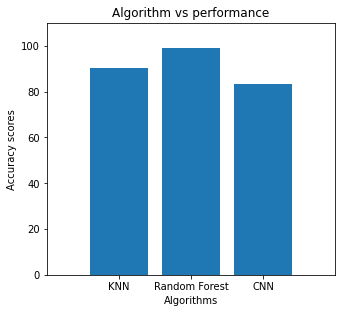

In [50]:
lst =[]
algo = ["KNN", "Random Forest", "CNN"]
for i in acc:
  x = i*100
  lst.append(x)
fig = plt.figure(figsize=(4,3.5))
ax = fig.add_axes([0,0,1,1])
plt.axis([-1,3,0,110])
plt.xlabel('Algorithms')
plt.ylabel('Accuracy scores')
plt.title('Algorithm vs performance')
ax.bar(algo,lst)

In [51]:
# #!/usr/bin/python
# from PIL import Image
# import os, sys

# path = "dataset/training/Orange/"
# dirs = os.listdir( path )

# def resize():
#     for item in dirs: 
#         if os.path.isfile(path+item): 
#             im = Image.open(path+item)
#             f, e = os.path.splitext(path+item)
#             imResize = im.resize((90,90), Image.ANTIALIAS)
#             imResize.save(f + ' resized.jpg', 'JPEG')

# resize()

In [52]:
# print(X_train.shape)
# print(X_test.shape)
# print(y_train.shape)
# print(y_test.shape)